# Convolutional Neural Network Image Classification

This project is to classify images of cats and dogs using a Convolutional Neural Network (CNN)

## Setup and Data Preparation:
- The code starts by importing necessary libraries like TensorFlow, Keras, and matplotlib.
- It downloads and unzips a dataset of cat and dog images.
- The data is split into training, validation, and test sets.

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
# original settings
# epochs = 15
# IMG_HEIGHT = 150
# IMG_WIDTH = 150
# changed
epochs = 5
IMG_HEIGHT =  224
IMG_WIDTH =  224

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

## Image Data Generators:
- The code creates ImageDataGenerator objects to preprocess and augment the images.
- For training data, it applies various augmentations like rotation, shifting, zooming, and flipping.

Create image generators for each of the three image data sets (train, validation, test).

Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument to rescale the tensors from values between 0 and 255 to values between 0 and 1.

In [3]:
# 3

print(total_train)
print(total_val)
print(total_test)

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,  # This is the target directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),   # All images will be resized to this size
    batch_size=batch_size,
    class_mode='binary'        # For binary classification; use 'categorical' for multi-class
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,  # This is the target directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),   # All images will be resized to this size
    batch_size=batch_size,
    class_mode='binary'        # For binary classification; use 'categorical' for multi-class
)
import pandas as pd

# Ensure we're working with the correct directory
print(f"Test directory path: {test_dir}")
print(f"Files in test directory: {os.listdir(test_dir)[:5]}...")  # Print first 5 files

# Filter for image files and exclude hidden files
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
filenames = [f for f in os.listdir(test_dir)
             if not f.startswith('.') and  # Exclude hidden files
             os.path.splitext(f.lower())[1] in valid_extensions]

print(f"Number of valid image files: {len(filenames)}")

# Create DataFrame
df = pd.DataFrame({'filename': filenames})
df['filepath'] = df['filename'].apply(lambda x: os.path.join(test_dir, x))

# Verify filepaths
print("Sample filepaths:")
print(df['filepath'].head())
print(df['filename'].head())

# Create the test data generator using a dataframe as the testing data is not
# split into subdirectories for classification
test_data_gen = test_image_generator.flow_from_dataframe(
    dataframe=df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    validate_filenames=True
)

# test_data_gen = test_image_generator.flow_from_directory(
#     test_dir, # Path to your test data directory
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     batch_size=batch_size,
#     class_mode=None,
#     shuffle=False # Important: set shuffle to False for test data
# )



2001
1001
51
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Test directory path: cats_and_dogs/test
Files in test directory: ['43.jpg', '11.jpg', '33.jpg', '24.jpg', '4.jpg']...
Number of valid image files: 50
Sample filepaths:
0    cats_and_dogs/test/43.jpg
1    cats_and_dogs/test/11.jpg
2    cats_and_dogs/test/33.jpg
3    cats_and_dogs/test/24.jpg
4     cats_and_dogs/test/4.jpg
Name: filepath, dtype: object
0    43.jpg
1    11.jpg
2    33.jpg
3    24.jpg
4     4.jpg
Name: filename, dtype: object
Found 50 validated image filenames.


The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional

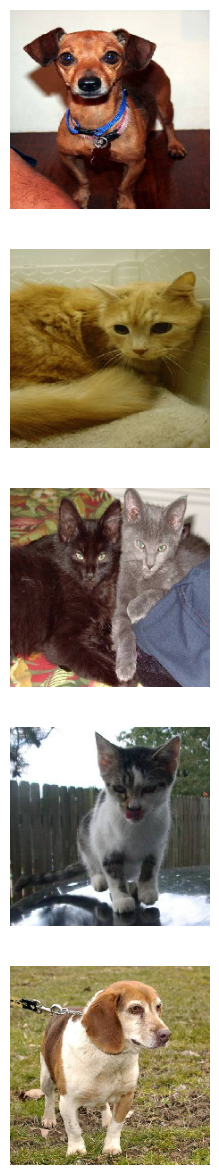

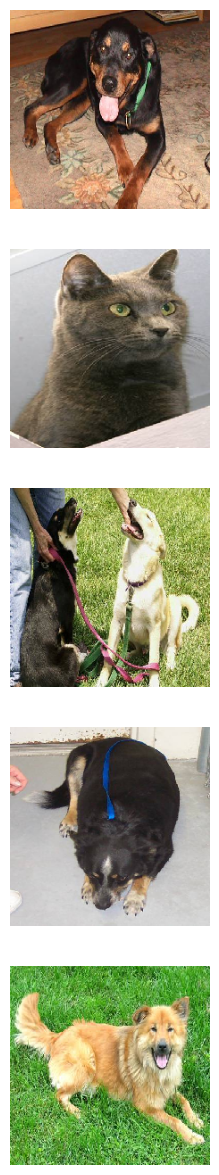

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

first_batch = next(test_data_gen)
first_five_images = first_batch[:5]
plotImages(first_five_images)


In [11]:
# 5
train_image_generator = ImageDataGenerator(
    rotation_range=40,        # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,    # Randomly translate images horizontally (fraction of total width)
    height_shift_range=0.2,   # Randomly translate images vertically (fraction of total height)
    zoom_range=0.2,           # Randomly zoom in/out on images
    horizontal_flip=True,     # Randomly flip images horizontally
    rescale=1./255)


Found 2000 images belonging to 2 classes.


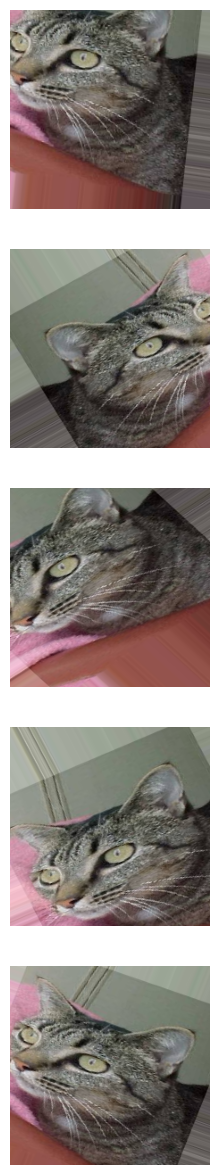

In [17]:
# 6

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                      directory=train_dir,
#                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

## Model Architecture:
- The model is a CNN using the Sequential API from Keras.
- It consists of several Conv2D and MaxPooling2D layers, followed by Dense layers.
- The final layer uses a sigmoid activation for binary classification (cat or dog).

## Training:
- The model is compiled with binary crossentropy loss and Adam optimizer.
- It's trained for 15 epochs using the fit method.


Create a model for the Convolutional Neural Network (CNN) that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

The first layer input_shape must match the training data, the image height, the img width and the 3 color channels, rgb.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [7]:
# 7
# Initialize the model
from tensorflow.keras.optimizers import Adam

model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add flatten layer
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Single unit with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      88,605,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,662,017 (338.22 MB)

 Trainable params: 88,662,017 (338.22 MB)

 Non-trainable params: 0 (0.00 B)

Use the fit method on your model to train the network.

Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

### Model Setup
1. Base Model: You are using the VGG16 model, pre-trained on the ImageNet dataset. This model is loaded without the top classification layers (include_top=False) and with weights initialized from ImageNet. The input shape is set to (IMG_HEIGHT, IMG_WIDTH, 3), which corresponds to the dimensions of your input images.
2. Freezing Layers: The base model's layers are frozen (base_model.trainable = False) to prevent them from being updated during training. This is done because the pre-trained layers already contain useful features for image recognition tasks, and freezing them helps in retaining this knowledge.
3. Custom Layers:
- Global Average Pooling: This layer reduces the spatial dimensions of the feature maps from the base model, effectively summarizing the presence of features across the entire image.
- Dense Layer: A fully connected layer with 512 units and ReLU activation is added. This layer learns new features specific to your dataset.
- Dropout Layer: A dropout rate of 0.5 is used to prevent overfitting by randomly setting half of the input units to zero during training.
- Output Layer: A dense layer with a single unit and a sigmoid activation function is used for binary classification (cat vs. dog).
4. Model Compilation: The model is compiled with the Adam optimizer, a learning rate of 0.0001, binary cross-entropy loss (suitable for binary classification), and accuracy as the evaluation metric.

In [8]:

# 8
steps_per_epoch=total_train // batch_size # Number of steps per epoch.
validation_steps=total_val // batch_size # Number of validation steps.

# Train the model
# history = model.fit(
#     x=train_data_gen,  # Training data generator
#     epochs=epochs,   # Number of epochs.
#     steps_per_epoch = steps_per_epoch,
#     validation_data=val_data_gen,  # Validation data generator
#     validation_steps=validation_steps  # Number of validation steps.
# )

## --------------

from tensorflow.keras.applications import VGG16, MobileNetV2, ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


# Choose base models
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)

model.save("MobileNetV2_dogs_vs_cats.keras")

# Load the model
# from tensorflow.keras.models import load_model
# model = load_model("dogs_vs_cats.keras")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 196s 12s/step - accuracy: 0.6664 - loss: 0.6169 - val_accuracy: 0.9743 - val_loss: 0.1610
Epoch 2/5
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:42 7s/step - accuracy: 0.9375 - loss: 0.2017

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.9375 - loss: 0.2017 - val_accuracy: 0.9712 - val_loss: 0.1741
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 182s 11s/step - accuracy: 0.9248 - loss: 0.2072 - val_accuracy: 0.9788 - val_loss: 0.0835
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8828 - loss: 0.2461 - val_accuracy: 0.9519 - val_loss: 0.1080
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 232s 11s/step - accuracy: 0.9360 - loss: 0.1648 - val_accuracy: 0.9743 - val_loss: 0.0763


## Evaluation and Visualization:
- The code plots the training and validation accuracy/loss over epochs.
- It then uses the model to predict on the test set and visualizes the results.

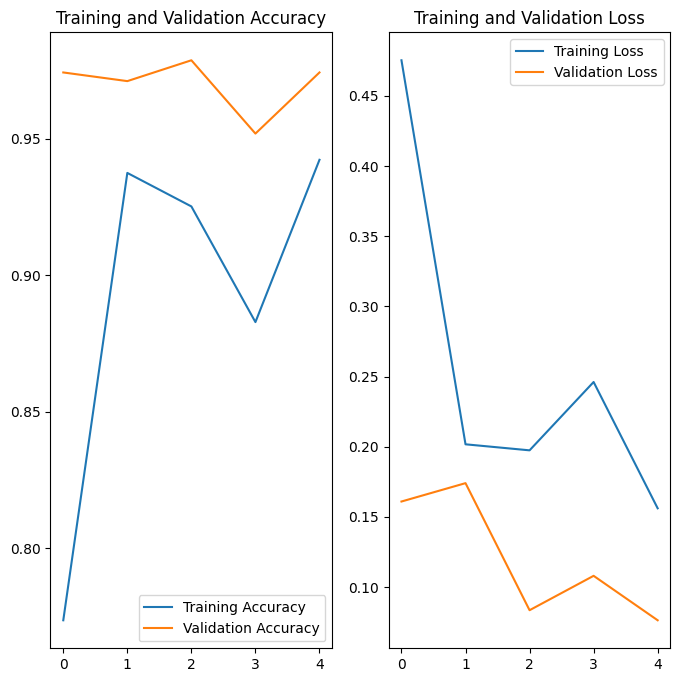

In [9]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. `probabilities` should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

test_data_gen len 1
Found 50 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


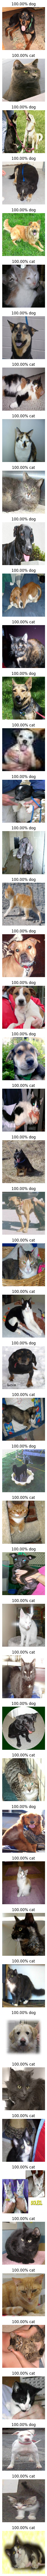

In [18]:
# prompt: Now it is time to use your model to predict whether a brand new image is a cat or a dog.
# In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.
# Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.
# After you run the cell, you should see all 50 test image

# Reset the test_data_gen generator to ensure it starts from the beginning
test_data_gen.reset()
print(f"test_data_gen len {len(test_data_gen)}")
print(f"Found {test_data_gen.n} validated image filenames.")

probabilities = model.predict(test_data_gen)
probabilities = [1 if x > 0.5 else 0 for x in probabilities]

print(probabilities)

# Get the first batch of images from the generator
x_test = next(test_data_gen)

plotImages(x_test[:50], probabilities)


## Final Accuracy Check:
- The code compares the model's predictions to a set of predetermined answers.
- It calculates the percentage of correctly identified images.
- The challenge is passed if the accuracy is 63% or higher.

In [19]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  print(probability, answer)
  if round(probability) == answer: # Access the first element of the probability array
     correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

1 1
0 0
1 0
1 1
1 0
0 0
1 0
0 0
0 1
0 1
1 0
1 1
0 0
1 1
0 0
1 1
1 1
1 0
1 1
1 1
1 0
0 0
1 1
1 1
0 1
0 1
1 1
0 0
1 0
0 0
1 0
0 0
0 1
1 1
0 0
1 1
0 1
0 1
0 1
1 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
1 0
0 0
0 0
Your model correctly identified 58.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
